<a href="https://colab.research.google.com/github/Kenule-dev/Machine-LearningProject/blob/main/My%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     Community  LGA  Spill_Frequency  ...  Population  Complaints_Level  Risk_Level
0            7    1                5  ...       20840                 0           1
1            2    3                6  ...       11964                 2           1
2            7    1                5  ...       24895                 0           2
3            7    3                4  ...        8085                 0           1
4            4    3                5  ...       23756                 0           1
..         ...  ...              ...  ...         ...               ...         ...
295          2    1                3  ...        7336                 0           1
296          3    1                6  ...       16661                 2           1
297          0    0                2  ...        3669                 0           2
298          3    2                6  ...       20020                 2           1
299          3    0                3  ...        4181                 2     

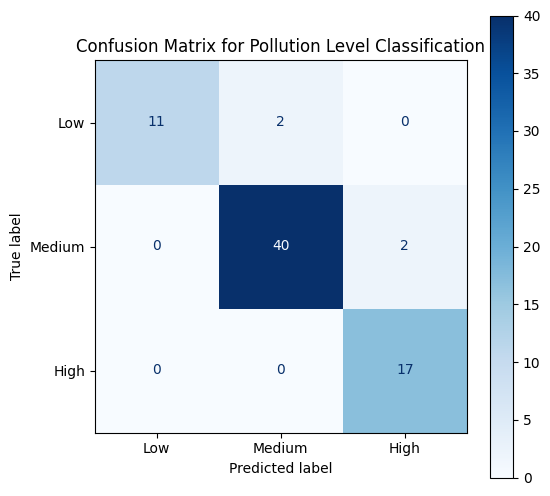

In [29]:
from IPython.lib.display import YouTubeVideo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

df=pd.read_csv('/content/ogoni_oil_spill_fully_synthetic.csv')



le = LabelEncoder()

df["Community"] = le.fit_transform(df["Community"])
df["LGA"] = le.fit_transform(df["LGA"])
df["Complaints_Level"] = le.fit_transform(df["Complaints_Level"])

print(df)


X=df.drop('Risk_Level', axis=1) # Feature data

Y=df['Risk_Level'] # Target data

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.24, random_state=42) # Splitting data for training

model=RandomForestClassifier(n_estimators=300, random_state=42) #RandomForest model

model.fit(X_train, Y_train) # Training the model

prediction=model.predict(X_test)

print('prediction is', prediction)

prob_prediction=model.predict_proba(X_test) # model to predict probability

print(f'Probability prediction is', prob_prediction) #probability of the prediction

predicted_class=np.argmax(prob_prediction, axis=1)  # predicted class

print('predicted class is:', predicted_class)

Labels=['Low', 'Medium', 'High']

final_prediction=[Labels[i] for i in predicted_class]

print('Final prediction is', final_prediction)

accuracy=r2_score(Y_test, prediction)

print(f'Accuracy is : {accuracy*100:.2f}%')

# developing confusion matrix model

confusion_matrix_model=confusion_matrix(Y_test, prediction)

print('Confusuion matrix is:', confusion_matrix_model)


cm = np.array([[11, 2, 0],
               [0, 40, 2],
               [0, 0, 17]])

# Class labels
labels = ["Low", "Medium", "High"]

# Create the display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

# Plot it
fig, ax = plt.subplots(figsize=(6,6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title("Confusion Matrix for Pollution Level Classification")
plt.show()






